       ┌───┐┌───┐     ┌───┐ ░ ┌───┐┌───┐          ┌───┐┌───┐     ┌─┐   
q12_0: ┤ H ├┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├───
       ├───┤├───┤┌─┴─┐├───┤ ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐└╥┘┌─┐
q12_1: ┤ H ├┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫─┤M├
       └───┘└───┘└───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║ └╥┘
 c2: 2/═══════════════════════════════════════════════════════════╩══╩═
                                                                  1  0 


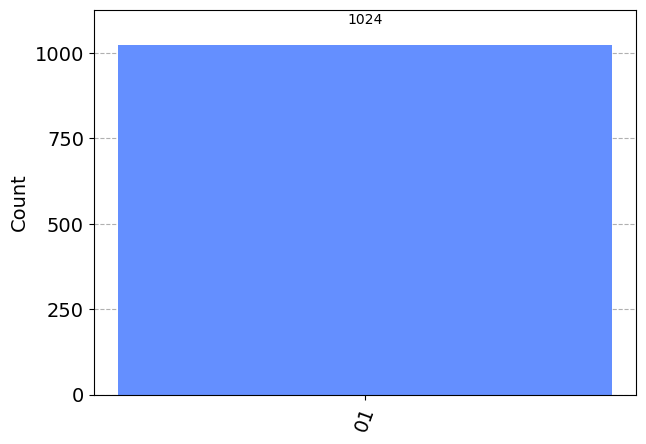

In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

# Define the quantum circuit with 2 qubits and 2 classical bits
n = 2
qreg = QuantumRegister(n)
creg = ClassicalRegister(n)
qc = QuantumCircuit(qreg, creg)

# Apply Hadamard gates to all qubits
qc.h(range(n))

# Define the oracle for the target state |01⟩
qc.x(qreg[0])
qc.h(qreg[1])
qc.cx(qreg[0], qreg[1])
qc.h(qreg[1])
qc.x(qreg[0])

qc.barrier()

# Define the diffusion operator
qc.h(range(n))
qc.x(range(n))
qc.h(-1)
qc.cx(qreg[0], qreg[1])
qc.h(-1)
qc.x(range(n))
qc.h(range(n))

# Measure the qubits and store the result in classical bits
qc.measure(qreg[0], creg[1])
qc.measure(qreg[1], creg[0])

# Draw the circuit
print(qc.draw())

# Simulate the circuit and get the counts
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

In [2]:
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()
backend = provider.get_backend('ibmq_jakarta')
job = execute(qc, backend, shots=1024)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)

IBMJobApiError: '"HTTPSConnectionPool(host=\'runtime-us-east.quantum-computing.ibm.com\', port=443): Max retries exceeded with url: /jobs/chjfqnmpqnphtdt766r0 (Caused by NewConnectionError(\'<urllib3.connection.HTTPSConnection object at 0x000001F83EF4A760>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed\'))"'